In [39]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('DatasetTrain.csv')
df_valid = pd.read_csv('DatasetValidation.csv')

In [4]:
df_train.shape , df_valid.shape

((4956, 46), (451, 46))

In [6]:
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , roc_auc_score , roc_curve , confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 

In [19]:
def prediction_report(modelName , selectorName ,  X_train , y_train , X_valid , y_valid ) :

    if modelName == 'rf' :
        cls = RandomForestClassifier(n_estimators=200 , random_state=42)
        model = RandomForestClassifier(n_estimators=200 , random_state=42)
    if modelName == 'xgb' :
        cls = XGBClassifier(random_state=42)
        model = XGBClassifier(random_state=42)
    if modelName == 'cat' :
        cls = CatBoostClassifier(random_state=42)
        model = CatBoostClassifier(random_state=42)

    if selectorName == 'rfe' :
        selector = RFE(cls)
    if selectorName == 'frm' :
        selector = SelectFromModel(cls)
    if selectorName == 'forward' :
        selector = SequentialFeatureSelector(cls)
    if selectorName == 'backward' :
        selector = SequentialFeatureSelector(cls , direction='backward')


    if selectorName == 'None' :
        X_train_new = X_train
        X_valid_new = X_valid
    else : 
        X_train_new = selector.fit_transform(X_train, y_train)
        X_valid_new = selector.transform(X_valid)


    model.fit(X_train_new , y_train)

    true_labels = y_valid
    predicted_probabilities = model.predict_proba(X_valid_new)

    report = classification_report(true_labels, np.argmax(predicted_probabilities, axis=1))
    print("Classification Report:\n", report)

    # Compute ROC AUC score
    roc_auc = roc_auc_score(true_labels, predicted_probabilities, multi_class='ovr')  # One-vs-Rest strategy
    print("ROC AUC Score:", roc_auc)

    # Plot ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve((true_labels == i).astype(int), predicted_probabilities[:, i])
        roc_auc[i] = roc_auc_score((true_labels == i).astype(int), predicted_probabilities[:, i])

    plt.figure()
    plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label=f'Class 0 (AUC = {roc_auc[0]:.2f})')
    plt.plot(fpr[1], tpr[1], color='green', lw=2, label=f'Class 1 (AUC = {roc_auc[1]:.2f})')
    plt.plot(fpr[2], tpr[2], color='blue', lw=2, label=f'Class 2 (AUC = {roc_auc[2]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-class Classification')
    plt.legend(loc="lower right")
    plt.show()

    sns.heatmap(confusion_matrix(true_labels , np.argmax(predicted_probabilities, axis=1)) , annot=True , cmap='YlGnBu')
    plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector

In [16]:
X_train = df_train.drop('OS' , axis = 1)
y_train = df_train['OS']

X_valid = df_valid.drop('OS' , axis = 1)
y_valid = df_valid['OS']

BASELINE (NO FEATURE SELECTION)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       1.00      0.65      0.79        17

    accuracy                           0.99       451
   macro avg       1.00      0.88      0.93       451
weighted avg       0.99      0.99      0.99       451

ROC AUC Score: 0.976543382732593


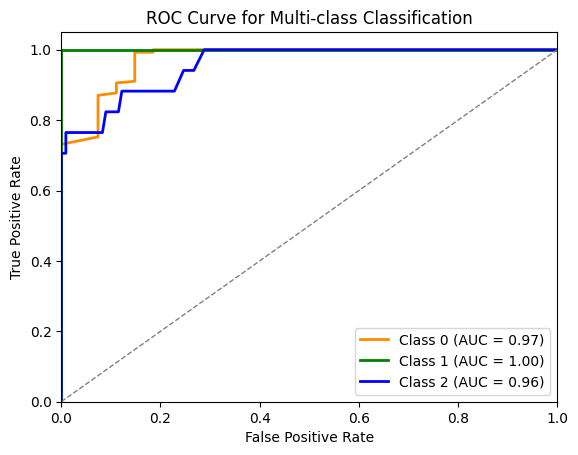

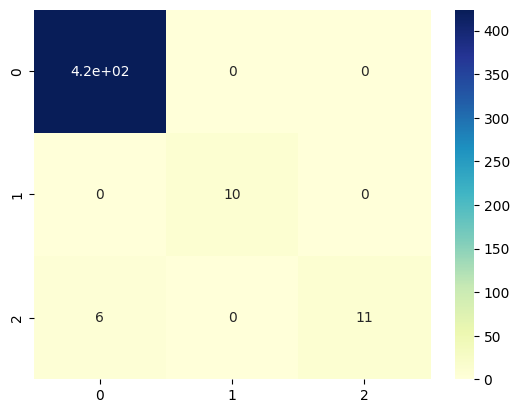

In [20]:
prediction_report('rf' , 'None' ,  X_train , y_train , X_valid , y_valid )

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       0.85      0.65      0.73        17

    accuracy                           0.98       451
   macro avg       0.94      0.88      0.91       451
weighted avg       0.98      0.98      0.98       451

ROC AUC Score: 0.9688828090917166


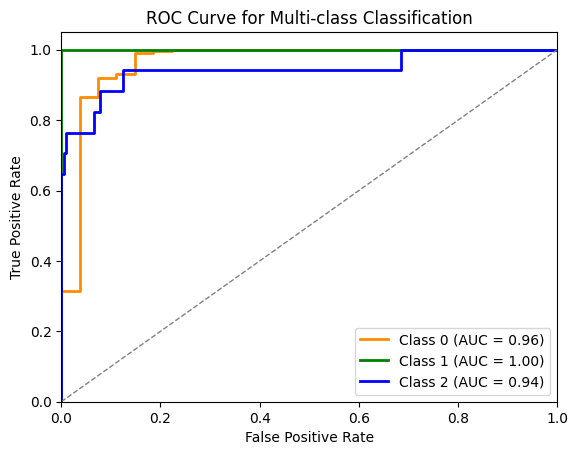

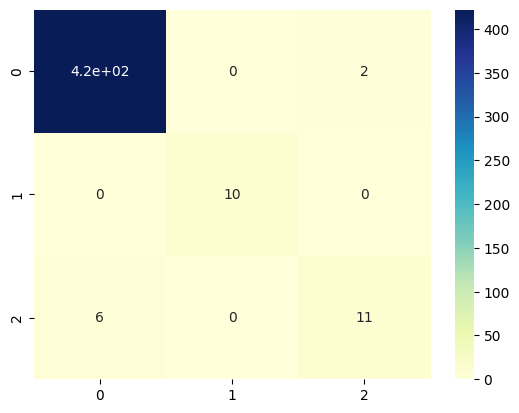

In [21]:
prediction_report('xgb' , 'None' ,  X_train , y_train , X_valid , y_valid )

Learning rate set to 0.085857
0:	learn: 0.9666752	total: 69.1ms	remaining: 1m 9s
1:	learn: 0.8630650	total: 72.9ms	remaining: 36.4s
2:	learn: 0.7723111	total: 77.3ms	remaining: 25.7s
3:	learn: 0.6995261	total: 80.9ms	remaining: 20.1s
4:	learn: 0.6398391	total: 84.8ms	remaining: 16.9s
5:	learn: 0.5860150	total: 87.9ms	remaining: 14.6s
6:	learn: 0.5439329	total: 92ms	remaining: 13s
7:	learn: 0.5057199	total: 95.4ms	remaining: 11.8s
8:	learn: 0.4667597	total: 98.7ms	remaining: 10.9s
9:	learn: 0.4353264	total: 102ms	remaining: 10.1s
10:	learn: 0.4050860	total: 106ms	remaining: 9.51s
11:	learn: 0.3774474	total: 110ms	remaining: 9.02s
12:	learn: 0.3516957	total: 113ms	remaining: 8.58s
13:	learn: 0.3284406	total: 116ms	remaining: 8.2s
14:	learn: 0.3091400	total: 139ms	remaining: 9.11s
15:	learn: 0.2910152	total: 161ms	remaining: 9.91s
16:	learn: 0.2740851	total: 180ms	remaining: 10.4s
17:	learn: 0.2597947	total: 184ms	remaining: 10.1s
18:	learn: 0.2458672	total: 188ms	remaining: 9.7s
19:	lear

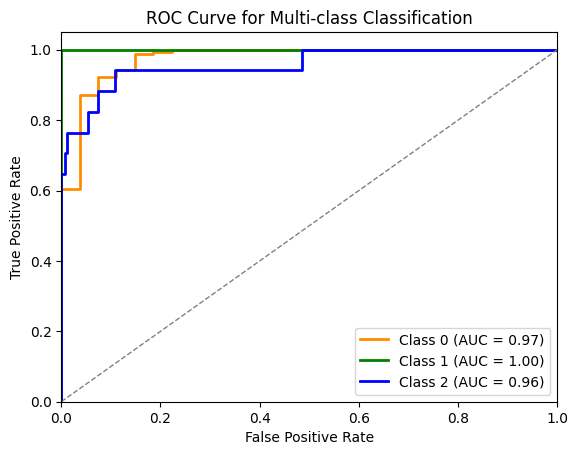

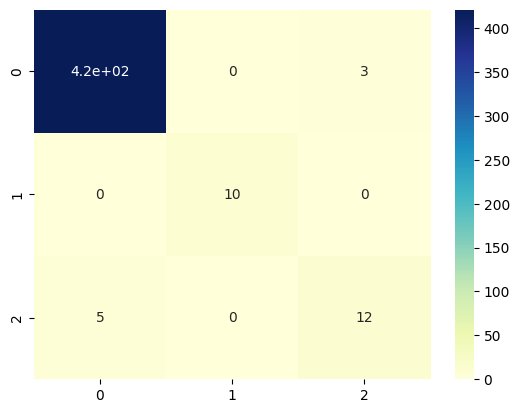

In [22]:
prediction_report('cat' , 'None' ,  X_train , y_train , X_valid , y_valid )

RFE

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       1.00      0.71      0.83        17

    accuracy                           0.99       451
   macro avg       1.00      0.90      0.94       451
weighted avg       0.99      0.99      0.99       451

ROC AUC Score: 0.9705243377529547


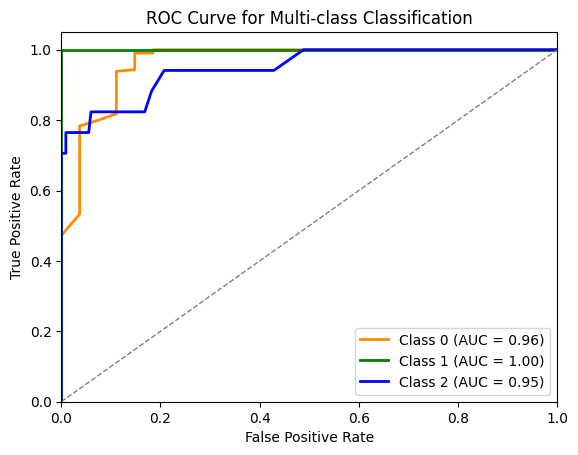

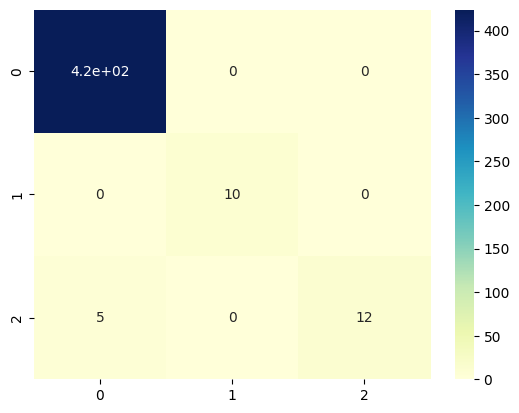

In [23]:
prediction_report('rf' , 'rfe' ,  X_train , y_train , X_valid , y_valid )

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       0.85      0.65      0.73        17

    accuracy                           0.98       451
   macro avg       0.94      0.88      0.91       451
weighted avg       0.98      0.98      0.98       451

ROC AUC Score: 0.961569624806709


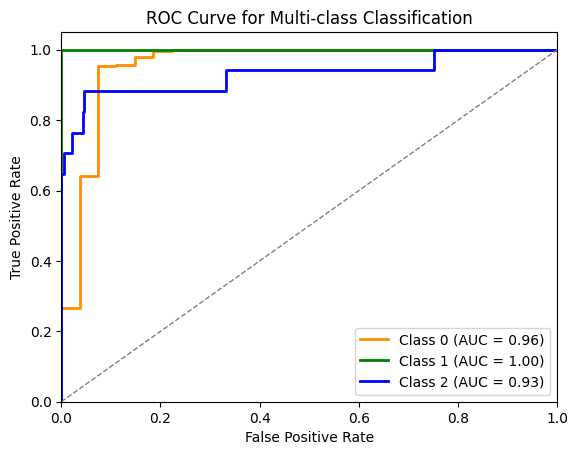

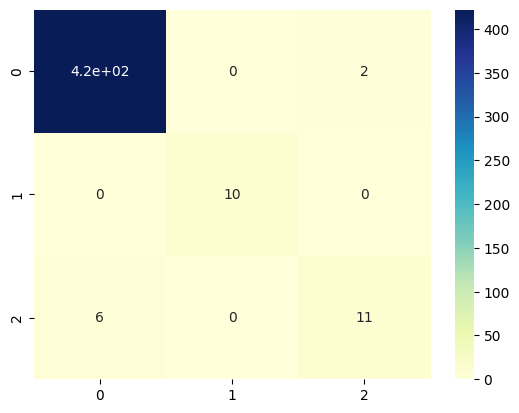

In [24]:
prediction_report('xgb' , 'rfe' ,  X_train , y_train , X_valid , y_valid )

Learning rate set to 0.085857
0:	learn: 0.9666752	total: 6.42ms	remaining: 6.42s
1:	learn: 0.8630650	total: 16.8ms	remaining: 8.39s
2:	learn: 0.7723111	total: 21.5ms	remaining: 7.13s
3:	learn: 0.6995261	total: 26.5ms	remaining: 6.6s
4:	learn: 0.6398391	total: 30.6ms	remaining: 6.1s
5:	learn: 0.5860150	total: 34.3ms	remaining: 5.69s
6:	learn: 0.5439329	total: 38.6ms	remaining: 5.47s
7:	learn: 0.5057199	total: 42ms	remaining: 5.21s
8:	learn: 0.4667597	total: 45.2ms	remaining: 4.98s
9:	learn: 0.4353264	total: 48.6ms	remaining: 4.81s
10:	learn: 0.4050860	total: 52.3ms	remaining: 4.7s
11:	learn: 0.3774474	total: 55.7ms	remaining: 4.58s
12:	learn: 0.3516957	total: 59.4ms	remaining: 4.51s
13:	learn: 0.3284406	total: 62.9ms	remaining: 4.43s
14:	learn: 0.3091400	total: 66.3ms	remaining: 4.35s
15:	learn: 0.2910152	total: 69.6ms	remaining: 4.28s
16:	learn: 0.2740851	total: 73.5ms	remaining: 4.25s
17:	learn: 0.2597947	total: 76.8ms	remaining: 4.19s
18:	learn: 0.2458672	total: 80.1ms	remaining: 4.1

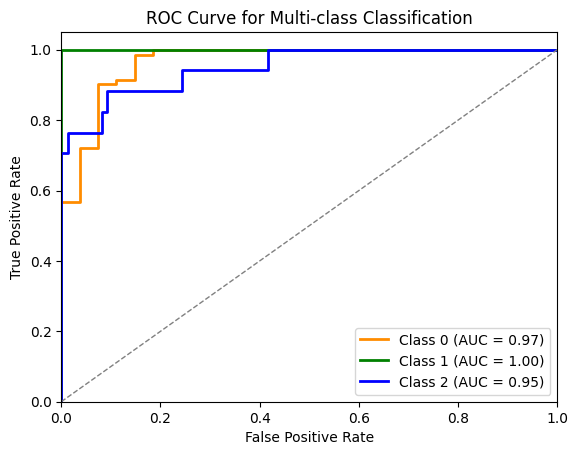

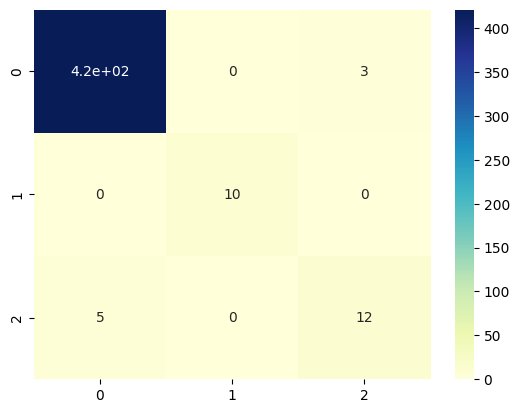

In [25]:
prediction_report('cat' , 'rfe' ,  X_train , y_train , X_valid , y_valid )

SelectFromModel

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       1.00      0.71      0.83        17

    accuracy                           0.99       451
   macro avg       1.00      0.90      0.94       451
weighted avg       0.99      0.99      0.99       451

ROC AUC Score: 0.9575746649734035


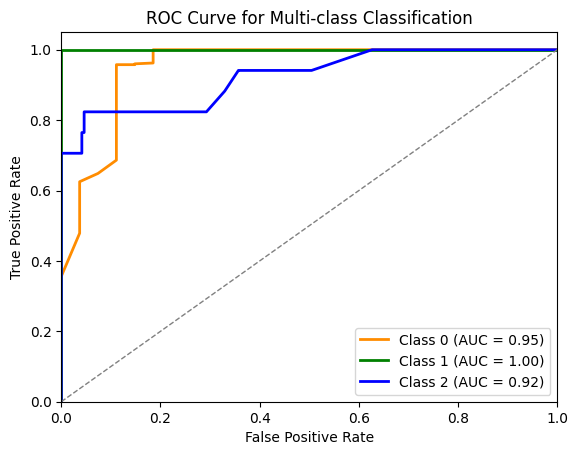

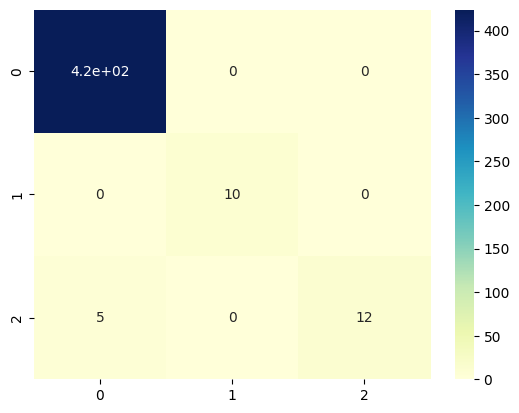

In [26]:
prediction_report('rf' , 'frm' ,  X_train , y_train , X_valid , y_valid )

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       0.80      0.71      0.75        17

    accuracy                           0.98       451
   macro avg       0.93      0.90      0.91       451
weighted avg       0.98      0.98      0.98       451

ROC AUC Score: 0.9599893021837577


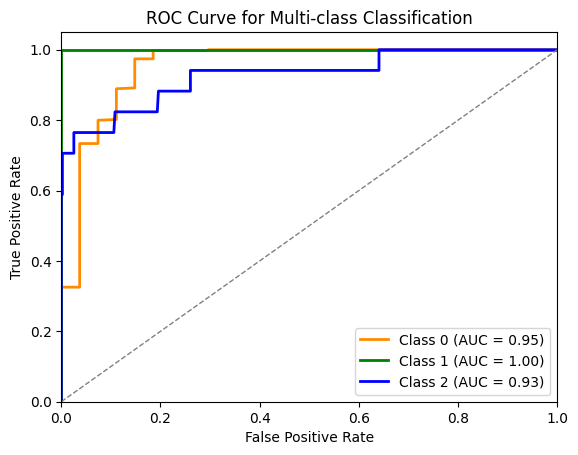

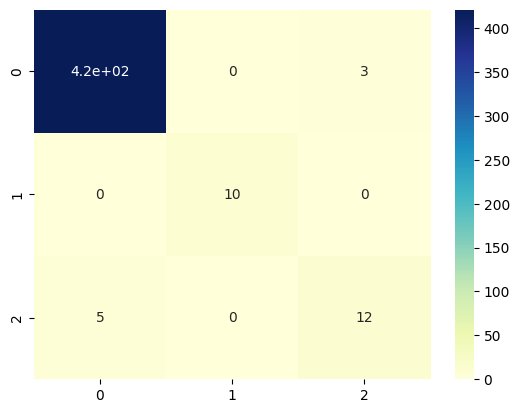

In [27]:
prediction_report('xgb' , 'frm' ,  X_train , y_train , X_valid , y_valid )

Learning rate set to 0.085857
0:	learn: 0.9666752	total: 16.7ms	remaining: 16.6s
1:	learn: 0.8630650	total: 22.8ms	remaining: 11.4s
2:	learn: 0.7723111	total: 27.1ms	remaining: 9.02s
3:	learn: 0.6995261	total: 32.2ms	remaining: 8.01s
4:	learn: 0.6398391	total: 36.1ms	remaining: 7.19s
5:	learn: 0.5860150	total: 39.6ms	remaining: 6.57s
6:	learn: 0.5439329	total: 43.2ms	remaining: 6.12s
7:	learn: 0.5057199	total: 46.8ms	remaining: 5.8s
8:	learn: 0.4667597	total: 50.4ms	remaining: 5.55s
9:	learn: 0.4353264	total: 53.8ms	remaining: 5.33s
10:	learn: 0.4050860	total: 57.4ms	remaining: 5.16s
11:	learn: 0.3774474	total: 60.9ms	remaining: 5.02s
12:	learn: 0.3516957	total: 64.5ms	remaining: 4.9s
13:	learn: 0.3284406	total: 68.1ms	remaining: 4.79s
14:	learn: 0.3091400	total: 71.5ms	remaining: 4.69s
15:	learn: 0.2910152	total: 75.1ms	remaining: 4.62s
16:	learn: 0.2740851	total: 78.5ms	remaining: 4.54s
17:	learn: 0.2597947	total: 83ms	remaining: 4.53s
18:	learn: 0.2458672	total: 86.6ms	remaining: 4.

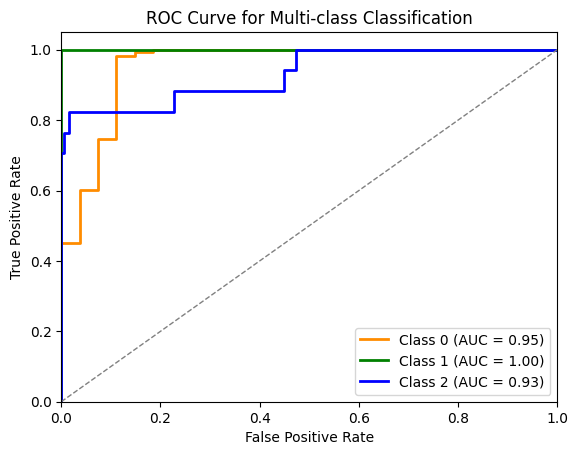

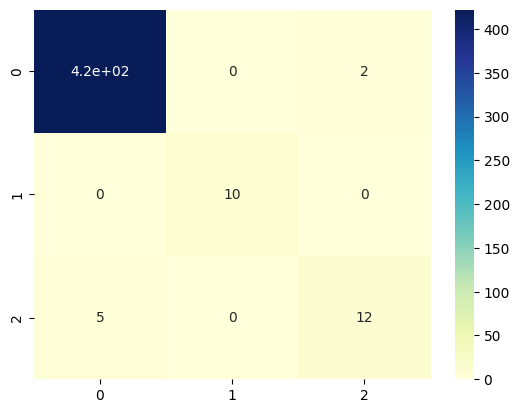

In [28]:
prediction_report('cat' , 'frm' ,  X_train , y_train , X_valid , y_valid )

FORWARD SELECTION

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       0.73      0.65      0.69        17

    accuracy                           0.98       451
   macro avg       0.91      0.88      0.89       451
weighted avg       0.98      0.98      0.98       451

ROC AUC Score: 0.967522917397161


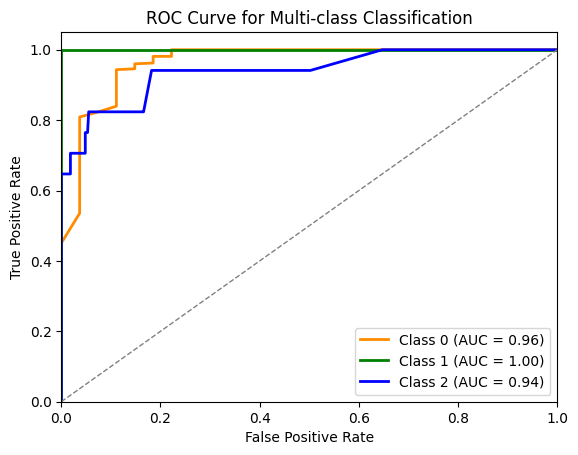

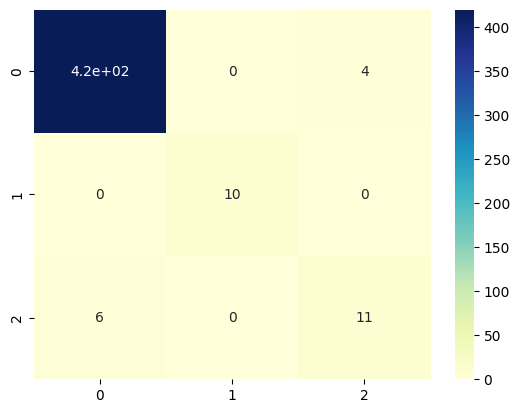

In [29]:
prediction_report('rf' , 'forward' ,  X_train , y_train , X_valid , y_valid )

In [ ]:
prediction_report('xgb' , 'forward' ,  X_train , y_train , X_valid , y_valid )

In [ ]:
prediction_report('cat' , 'forward' ,  X_train , y_train , X_valid , y_valid )

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       424
         1.0       1.00      0.80      0.89        10
         2.0       1.00      0.71      0.83        17

    accuracy                           0.98       451
   macro avg       0.99      0.84      0.90       451
weighted avg       0.98      0.98      0.98       451

ROC AUC Score: 0.9711305334333639


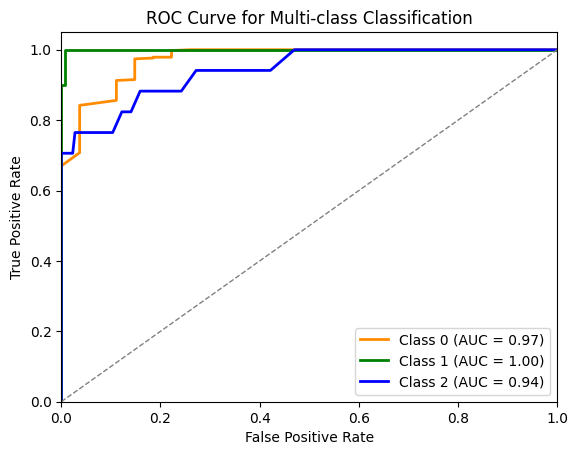

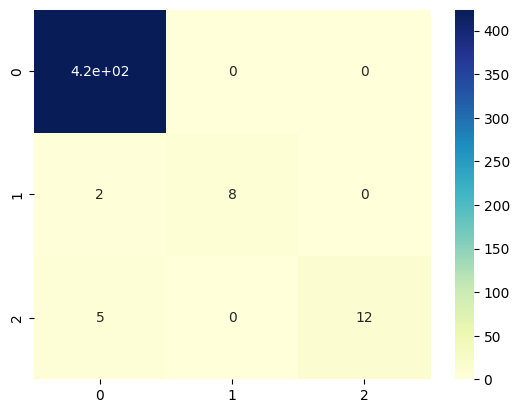

In [30]:
prediction_report('rf' , 'backward' ,  X_train , y_train , X_valid , y_valid )

In [ ]:
prediction_report('xgb' , 'backward' ,  X_train , y_train , X_valid , y_valid )

In [ ]:
prediction_report('cat' , 'backward' ,  X_train , y_train , X_valid , y_valid )

PCA

In [32]:
from sklearn.decomposition import PCA

In [31]:
def prediction_report_PCA(modelName , n_component ,  X_train , y_train , X_valid , y_valid ) :

    if modelName == 'rf' :
        model = RandomForestClassifier(n_estimators=200 , random_state=42)
    if modelName == 'xgb' :
        model = XGBClassifier(random_state=42)
    if modelName == 'cat' :
        model = CatBoostClassifier(random_state=42)

    pca = PCA(n_components=n_component) 
    X_train_new = pca.fit_transform(X_train)
    X_valid_new = pca.transform(X_valid)


    model.fit(X_train_new , y_train)

    true_labels = y_valid
    predicted_probabilities = model.predict_proba(X_valid_new)

    report = classification_report(true_labels, np.argmax(predicted_probabilities, axis=1))
    print("Classification Report:\n", report)

    # Compute ROC AUC score
    roc_auc = roc_auc_score(true_labels, predicted_probabilities, multi_class='ovr')  # One-vs-Rest strategy
    print("ROC AUC Score:", roc_auc)

    # Plot ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve((true_labels == i).astype(int), predicted_probabilities[:, i])
        roc_auc[i] = roc_auc_score((true_labels == i).astype(int), predicted_probabilities[:, i])

    plt.figure()
    plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label=f'Class 0 (AUC = {roc_auc[0]:.2f})')
    plt.plot(fpr[1], tpr[1], color='green', lw=2, label=f'Class 1 (AUC = {roc_auc[1]:.2f})')
    plt.plot(fpr[2], tpr[2], color='blue', lw=2, label=f'Class 2 (AUC = {roc_auc[2]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-class Classification')
    plt.legend(loc="lower right")
    plt.show()

    sns.heatmap(confusion_matrix(true_labels , np.argmax(predicted_probabilities, axis=1)) , annot=True , cmap='YlGnBu')
    plt.show()


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       424
         1.0       1.00      0.80      0.89        10
         2.0       0.67      0.71      0.69        17

    accuracy                           0.97       451
   macro avg       0.88      0.83      0.85       451
weighted avg       0.97      0.97      0.97       451

ROC AUC Score: 0.973147305968216


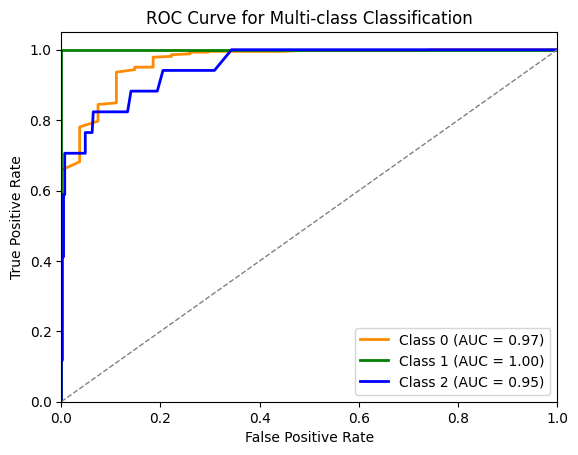

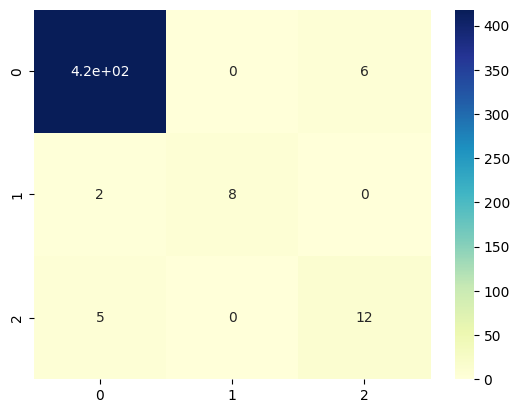

In [35]:
prediction_report_PCA('rf' , 32 ,  X_train , y_train , X_valid , y_valid )

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       424
         1.0       1.00      1.00      1.00        10
         2.0       0.57      0.71      0.63        17

    accuracy                           0.97       451
   macro avg       0.85      0.89      0.87       451
weighted avg       0.97      0.97      0.97       451

ROC AUC Score: 0.9719214132306515


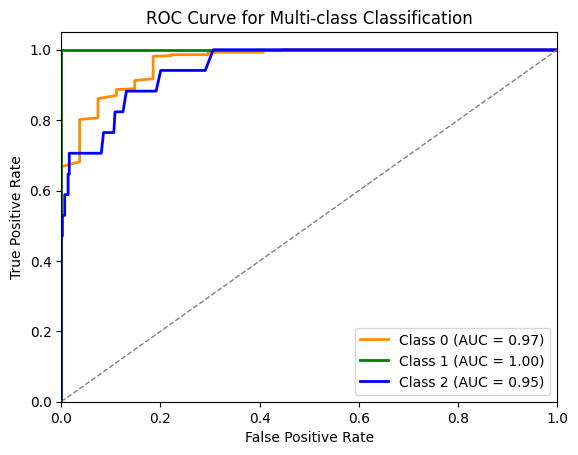

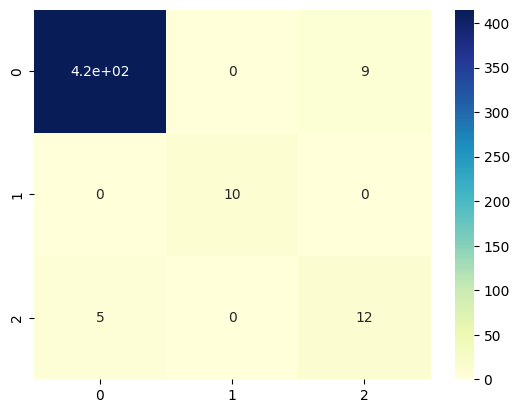

In [34]:
prediction_report_PCA('rf' , 16 ,  X_train , y_train , X_valid , y_valid )

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       424
         1.0       1.00      1.00      1.00        10
         2.0       0.46      0.65      0.54        17

    accuracy                           0.96       451
   macro avg       0.81      0.87      0.84       451
weighted avg       0.97      0.96      0.96       451

ROC AUC Score: 0.973743181815455


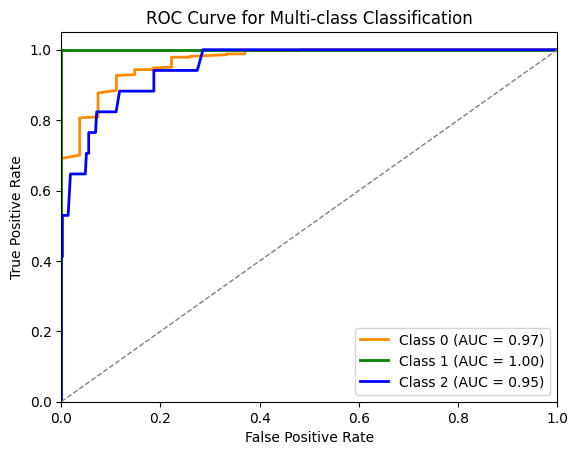

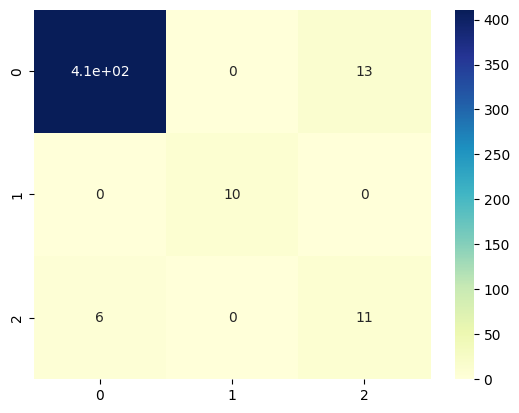

In [33]:
prediction_report_PCA('rf' , 10 ,  X_train , y_train , X_valid , y_valid )

In [73]:

cls = RandomForestClassifier(n_estimators=200 , random_state=42)

selector = RFE(cls)
X_train_new = selector.fit_transform(X_train, y_train)
X_valid_new = selector.transform(X_valid)



In [45]:
X_train_new = pd.DataFrame(X_train_new)
X_train_new.to_csv('X_train.csv' , index=False)
y_train.to_csv('y_train.csv' , index=False)

X_valid_new = pd.DataFrame(X_valid_new)
X_valid_new.to_csv('X_valid.csv' , index=False)
y_valid.to_csv('y_valid.csv' , index=False)

In [71]:
df_test = pd.read_csv('DatasetTest.csv')

In [72]:
X_test = df_test.drop('OS' , axis = 1)
y_test = df_test['OS']

In [74]:
X_test_new = selector.transform(X_test)

In [75]:
X_test_new = pd.DataFrame(X_test_new)
X_test_new.to_csv('X_test_new.csv' , index=False)
y_test.to_csv('y_test.csv' , index=False)

PART 2

In [63]:
df_train2 = pd.read_csv('DatasetTrain2.csv')
df_valid2 = pd.read_csv('DatasetValidation2.csv')

In [64]:
X_train2 = df_train2.drop('OS' , axis = 1)
y_train2 = df_train2['OS']

X_valid2 = df_valid2.drop('OS' , axis = 1)
y_valid2 = df_valid2['OS']

In [65]:
cls = RandomForestClassifier(n_estimators=200 , random_state=42)

selector = RFE(cls)
X_train_new2 = selector.fit_transform(X_train2, y_train2)
X_valid_new2 = selector.transform(X_valid2)

In [66]:
X_train_new2 = pd.DataFrame(X_train_new2)
X_train_new2.to_csv('X_train2.csv' , index=False)
y_train2.to_csv('y_train2.csv' , index=False)

X_valid_new2 = pd.DataFrame(X_valid_new2)
X_valid_new2.to_csv('X_valid2.csv' , index=False)
y_valid2.to_csv('y_valid2.csv' , index=False)

In [67]:
df_test2 = pd.read_csv('DatasetTest2.csv')

In [68]:
X_test2 = df_test2.drop('OS' , axis = 1)
y_test2 = df_test2['OS']

In [69]:
X_test_new2 = selector.transform(X_test2)

In [70]:
X_test_new2 = pd.DataFrame(X_test_new2)
X_test_new2.to_csv('X_test_new2.csv' , index=False)
y_test2.to_csv('y_test2.csv' , index=False)